In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
from functions import *
from simpledbf import Dbf5

%matplotlib inline
from IPython.display import Image
import pandas as pd
pd.options.display.max_colwidth = 200
pd.set_option('display.max_rows', None)


PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [3]:
line_count = 6
top, bottom = 750, 595
lines = [top - (top-bottom)/line_count*x for x in range(line_count)]


Total fires: 58
Total fires: 58


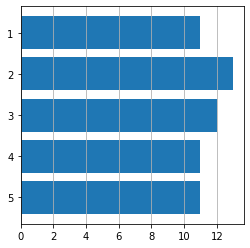

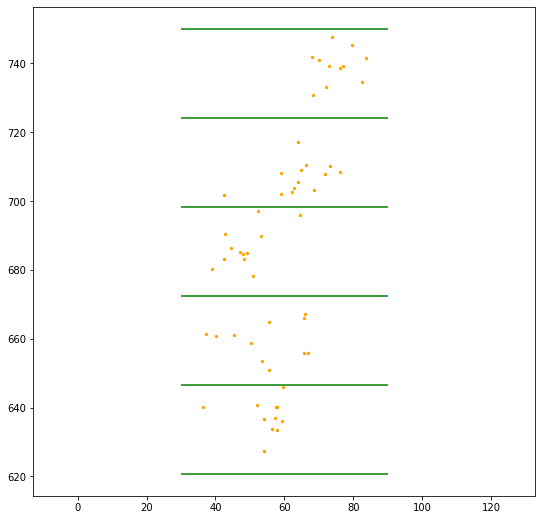

In [8]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
name = '/home/johan/Desktop/skogsbrand.sqlite'
db = SQLiteDB(name)
df = db.read("SELECT * FROM skogstyrelsen_brand")
db.disconnect
#df = df.drop([ "Producent", "Lopnr", "Laddatum", "Aktualitet", "shape_STAr", "shape_STLe"], axis = 1)
#df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.CenterX.astype(str)+"&y="+df.CenterY.astype(str)+"&scale=600&bg=KARTA"




def selected(df):
    df = df[df.johan_quality >=2]
    return df
def unselected(df):
    df = df[df.johan_quality.isnull()]
    #df = df[df.GISHektar > 3]
    df = df.sort_values(by=['centery'])
    return df
def zone(df, zone):
    df = df[df.centerx < lines[-1+zone]*10000]
    df = df[df.centerx > lines[0+zone]*10000]
    return df
def slope(df):
    df2 = Dbf5('/home/johan/Desktop/confused/firesites.dbf').to_dataframe()
    df2 = df2[df2.slope10 == 1]
    df2 = df2[df2.slope30 == 0]
    df = df[df.OBJECTID.isin(df2.OBJECTID)]
    return df

sites_per_zone(df, lines)
df = selected(df)
#df = unselected(df)
#df = zone(df,1)
#df = slope(df)

#df = df[df.OBJECTID.isin([100,325,161,131,171,124])] #OLD GROWTH
print("Total fires: {}".format(len(df.index)))
plot(df, lines)




In [5]:
name = '/Users/johan/Documents/Programming/skogsbrand/db.sqlite3'

#df = calculate_walk(name)
#display(df)
#for index, row in df.iterrows(): print("UPDATE fires_site SET walk = {} WHERE id = {};".format(row['Walk'], index+1))

In [6]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
db = SQLiteDB(name)
#df = db.read("SELECT * FROM fires_site ORDER BY fire_id")
df = db.read("SELECT * FROM fires_fire WHERE id IN (123, 170, 130, 160, 324, 99, 137) ORDER BY id")
db.disconnect
df = df.drop(["summary", "Producent", "Lopnr", "Laddatum", "Aktualitet", "shape_STAr", "shape_STLe"], axis = 1)
df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.CenterX.astype(str)+"&y="+df.CenterY.astype(str)+"&scale=37502.2872&bg=KARTA"

#df.to_csv("/home/johan/Desktop/parking_sites.csv")
display(df)

,id,NAMN,GISHektar,Lannamn,CenterX,CenterY,Kommunnamn,Metod,Kvalitet,Kommentar,OBJECTID,quality,link
0,99,None,88,Västerbottens län,7175755.0,631677.0,Lycksele,Manuell kartering - satellit,Granskad - God,ny kartering av Copernicus polygon,99,1.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7175755.0&y=631677.0&scale=37502.2872&bg=KARTA
1,123,None,16,Kronobergs län,6303240.0,526381.0,Lessebo,Manuell kartering - satellit,Granskad - God,ny kartering av Copernicus polygon,123,1.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6303240.0&y=526381.0&scale=37502.2872&bg=KARTA
2,130,None,28,Kalmar län,6369859.0,571743.0,Oskarshamn,Manuell kartering - satellit,Granskad - God,ny kartering av Copernicus polygon,130,2.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6369859.0&y=571743.0&scale=37502.2872&bg=KARTA
3,137,None,51,Norrbottens län,7380131.0,859943.0,Överkalix,Manuell kartering - satellit,Granskad - God,ny kartering av Metria polygon med mindre justeringar,137,1.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7380131.0&y=859943.0&scale=37502.2872&bg=KARTA
4,160,None,1,Gävleborgs län,6876181.0,546120.0,Ljusdal,Manuell kartering - satellit,Granskad - God,None,160,NaN,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6876181.0&y=546120.0&scale=37502.2872&bg=KARTA
5,170,None,1,Dalarnas län,6791971.0,517157.0,Rättvik,Manuell kartering - satellit,Granskad - God,None,170,NaN,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6791971.0&y=517157.0&scale=37502.2872&bg=KARTA
6,324,None,31,Västerbottens län,7100306.0,731717.0,Vännäs,Manuell kartering - satellit,Granskad - God,"Brand utmed järnväg, består av flera mindre områden (multi part features)",324,3.0,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7100306.0&y=731717.0&scale=37502.2872&bg=KARTA


In [7]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
db = SQLiteDB(name)
df2 = db.read("SELECT * FROM fires_site ORDER BY fire_id")
db.disconnect

df1 = pd.read_csv("/home/johan/Desktop/confused/points_sweref.csv", index_col=1)
df = pd.read_csv("/home/johan/Desktop/confused/ge_samplesites_pts.csv", index_col=1)
df['X'] = df1['POINT_X']
df['Y'] = df1['POINT_Y']

df = df[df.latitude != df.POINT_Y]
df = df.drop(["FID","parking_id","comment", "walk","rank", "latitude", "longitude"], axis = 1)
df = df.rename(index=str, columns={"POINT_X": "longitude", "POINT_Y": "latitude"})
df2.to_csv("/home/johan/Desktop/allpoints.csv")
df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.Y.astype(str)+"&y="+df.X.astype(str)+"&scale=37502.2872&bg=KARTA"
#display(df2)

FileNotFoundError: [Errno 2] File b'/home/johan/Desktop/confused/points_sweref.csv' does not exist: b'/home/johan/Desktop/confused/points_sweref.csv'

In [ ]:
pd.set_option('display.max_columns', 500)

#df = Dbf5('/home/johan/Desktop/firesites.dbf').to_dataframe()
#df.head()

In [ ]:
#df = pd.read_csv("/home/johan/Desktop/new_points.csv", index_col=0)
for index, row in df.iterrows():
    pass#print('UPDATE fires_site SET latitude = {}, longitude = {} WHERE id = {};'.format(row['latitude'],row['longitude'],index))

In [ ]:
name = '/home/johan/Documents/Programming/skogsbrand/db.sqlite3'
db = SQLiteDB(name)
df = db.read("SELECT * FROM fires_fire ORDER BY gishektar")
db.disconnect

for index, row in df.iterrows():
    if row['summary']:
        pass#print('UPDATE skogstyrelsen_brand SET johan_quality = {}, johan_summary = "{}" WHERE ogc_fid = {};'.format(int(row['quality']), row['summary'], index))

#df.to_csv('/home/johan/Desktop/parking.csv')

In [ ]:
import geopandas as gp
df = gp.read_file('/home/johan/Desktop/Skogstyrelsen_Data/brand.shp')

#>display(df)

In [ ]:

class Database():
    
    def __init__(self, db_name, id_name):
            self.id_name = id_name
            self.connection = self.connect(db_name)
            self.connection.enable_load_extension(True)
            c = self.connection.cursor()
            sql = 'SELECT load_extension("mod_spatialite.so");'
            c.execute(sql)
     
    
    def read(self, sql): pass
    
    def connect(self,db_name): pass
    
    def insert(self, table_name, dataframe): print("yaa, inserted, get some!")
        
    def disconnect(self): pass
        
    def __del__(self): self.disconnect()
        

class SQLiteDB(Database):
    
    def connect(self,db_name): return sqlite3.connect(db_name)

    def read(self, sql): return pd.read_sql_query(sql, self.connection,
                                                  index_col=self.id_name)
    
    def insert(self, table_name, dataframe):
        dataframe.to_sql(table_name, self.connection,
                         if_exists="append", index = False)
        
    def disconnect(self): self.connection.close()


In [ ]:
sql="SELECT fire_id, X(Geometry), Y(Geometry) FROM study_site"
db_name = '/home/johan/Desktop/skogsbrand.sqlite'
db = SQLiteDB(db_name, 'fire_id')
df2 = db.read(sql)
db.disconnect
display(df2)



In [ ]:
conn = sqlite3.connect(name)

conn.enable_load_extension(True)
c = conn.cursor()
sql = 'SELECT load_extension("mod_spatialite.so");'
sql1 = 'SELECT X(geometry) from study_site;'
# Create table
c.execute(sql)
a = c.execute(sql1)

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()